<a href="https://www.kaggle.com/renanfioramonte/alexa-nlp?scriptVersionId=88591862" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
review_df = pd.read_csv('../input/amazon-alexa-reviews/amazon_alexa.tsv', sep='\t')

### SUMMARY

In [3]:
review_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
review_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## EDA

<AxesSubplot:>

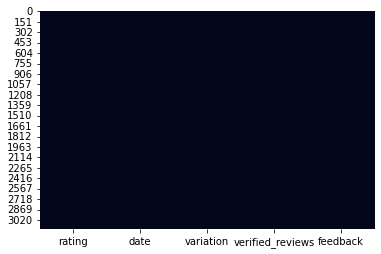

In [6]:
sns.heatmap(review_df.isnull(), cbar=False)

In [7]:
review_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>]], dtype=object)

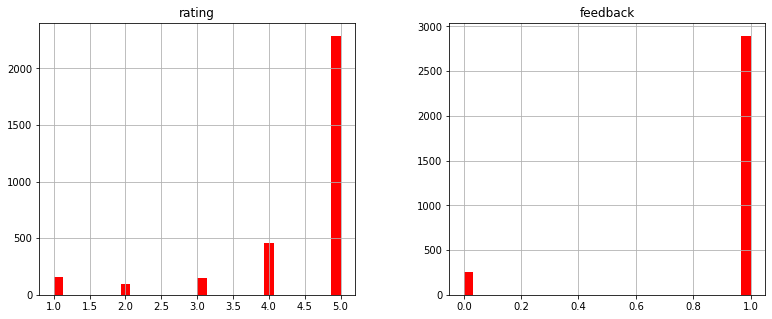

In [8]:
review_df.hist(bins=30, figsize=(13,5), color='r')

In [9]:
review_df['length'] = review_df['verified_reviews'].apply(len)
review_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:ylabel='Frequency'>

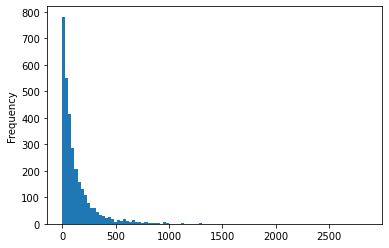

In [10]:
review_df['length'].plot(bins=100, kind='hist')

In [11]:
review_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [12]:
review_df[review_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [13]:
review_df[review_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

#### Creating a df with the POSITIVE reviews

In [14]:
positive = review_df[review_df['feedback'] == 1]

In [15]:
positive.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


#### Creating a df with the NEGATIVE reviews

In [16]:
negative = review_df[review_df['feedback'] == 0]

In [17]:
negative.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='feedback', ylabel='count'>

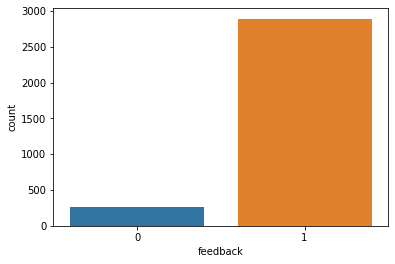

In [18]:
sns.countplot(review_df['feedback'])

<AxesSubplot:xlabel='rating', ylabel='count'>

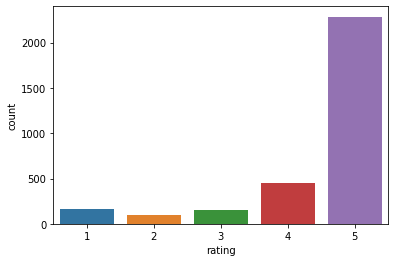

In [19]:
sns.countplot(x = 'rating', data = review_df)

<AxesSubplot:xlabel='variation', ylabel='rating'>

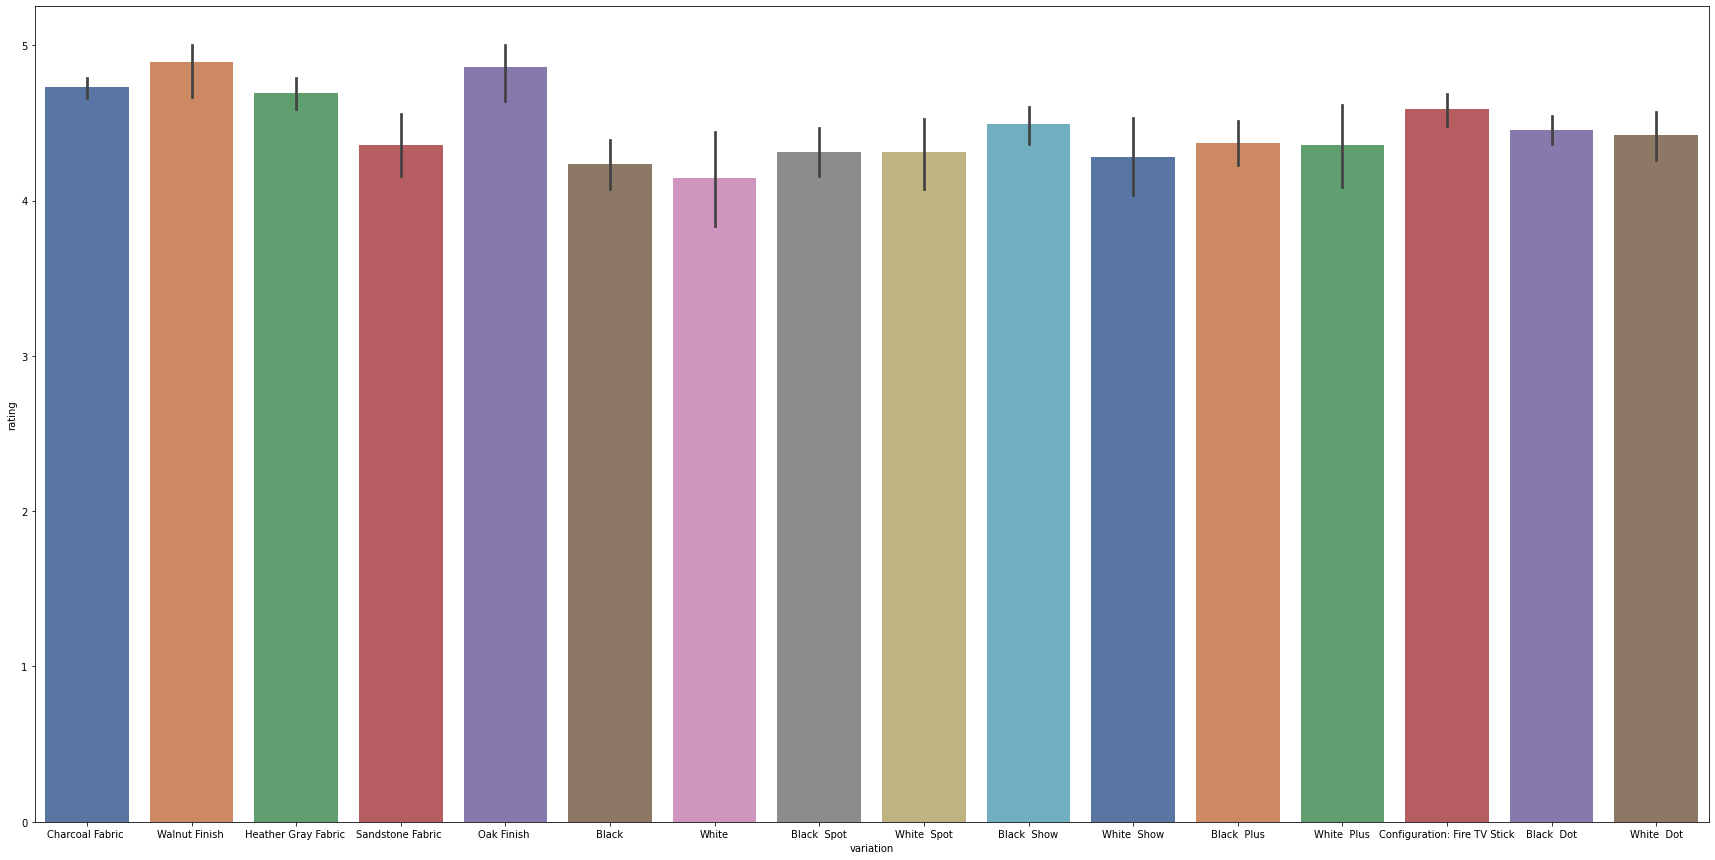

In [20]:
plt.figure(figsize=(30,15))
sns.barplot(x = 'variation', y = 'rating', data = review_df, palette = 'deep')

In [21]:
sentences = review_df['verified_reviews'].tolist()

In [22]:
## OBS.: to create a word cloud, all the strings must be in one variable ie list

In [23]:
sentences_as_one_string = ' '.join(sentences)

In [24]:
from wordcloud import WordCloud

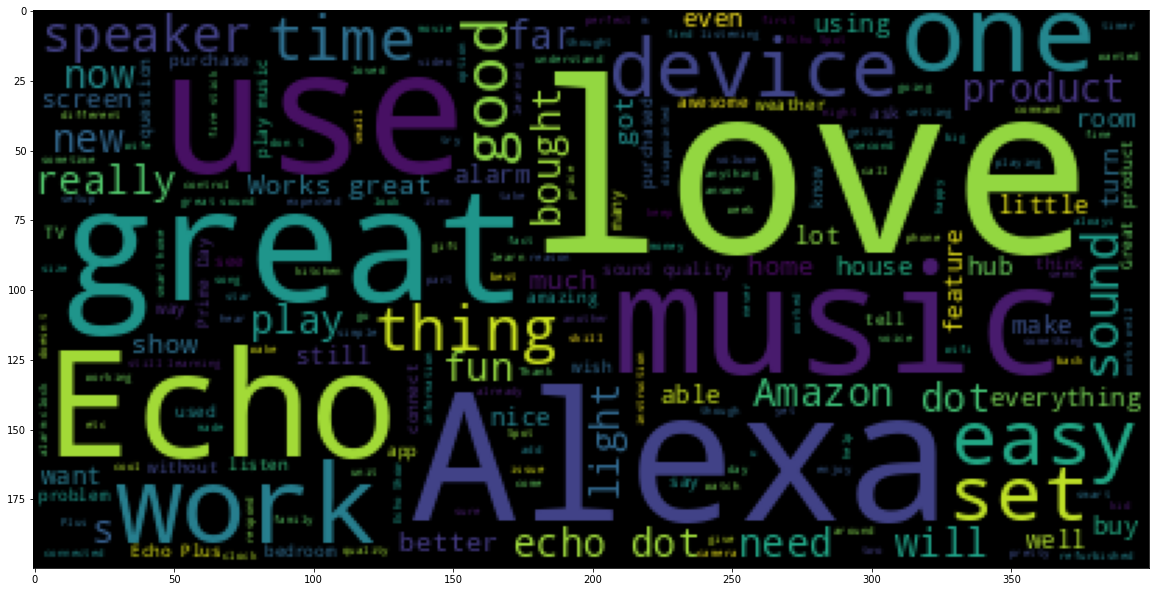

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [26]:
negative_list = negative['verified_reviews'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)

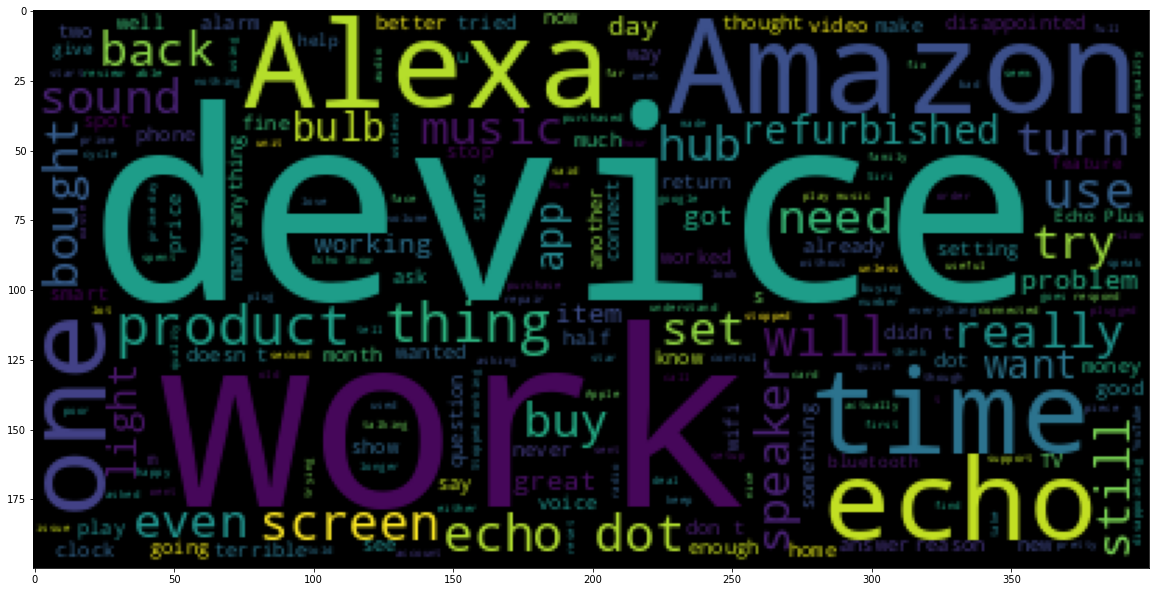

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

### DATA CLEANING

In [28]:
review_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [29]:
review_df = review_df.drop(['date', 'rating', 'length'], axis = 1)
review_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


### Dummy variables

In [30]:
review_df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [31]:
X_cat = review_df[['variation']]

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
onehotencoder = OneHotEncoder()

In [34]:
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [35]:
type(X_cat)

numpy.ndarray

In [36]:
X_cat = pd.DataFrame(X_cat)

In [37]:
review_df.drop(['variation'], axis = 1, inplace=True)

In [38]:
review_df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [39]:
review_df = pd.concat([review_df, X_cat], axis = 1)
review_df

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### REMOVING PUNCTUATION FROM TEXT

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
test = "You will feel like Tony Stark on this device. I added quite a few Alexa always loads them up quickly. Adding songs that you hear to specific playlists on Amazon Music is also a great feature.I can go on and on and this is only my second day of ownership.I was lucky to buy this for $100 on Prime Day, but I think for $150 is "

In [42]:
test_punct_removed = [char for char in test if char not in string.punctuation]

In [43]:
print(test_punct_removed)

['Y', 'o', 'u', ' ', 'w', 'i', 'l', 'l', ' ', 'f', 'e', 'e', 'l', ' ', 'l', 'i', 'k', 'e', ' ', 'T', 'o', 'n', 'y', ' ', 'S', 't', 'a', 'r', 'k', ' ', 'o', 'n', ' ', 't', 'h', 'i', 's', ' ', 'd', 'e', 'v', 'i', 'c', 'e', ' ', 'I', ' ', 'a', 'd', 'd', 'e', 'd', ' ', 'q', 'u', 'i', 't', 'e', ' ', 'a', ' ', 'f', 'e', 'w', ' ', 'A', 'l', 'e', 'x', 'a', ' ', 'a', 'l', 'w', 'a', 'y', 's', ' ', 'l', 'o', 'a', 'd', 's', ' ', 't', 'h', 'e', 'm', ' ', 'u', 'p', ' ', 'q', 'u', 'i', 'c', 'k', 'l', 'y', ' ', 'A', 'd', 'd', 'i', 'n', 'g', ' ', 's', 'o', 'n', 'g', 's', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'h', 'e', 'a', 'r', ' ', 't', 'o', ' ', 's', 'p', 'e', 'c', 'i', 'f', 'i', 'c', ' ', 'p', 'l', 'a', 'y', 'l', 'i', 's', 't', 's', ' ', 'o', 'n', ' ', 'A', 'm', 'a', 'z', 'o', 'n', ' ', 'M', 'u', 's', 'i', 'c', ' ', 'i', 's', ' ', 'a', 'l', 's', 'o', ' ', 'a', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'f', 'e', 'a', 't', 'u', 'r', 'e', 'I', ' ', 'c', 'a', 'n', ' ', 'g', 'o', ' ', 'o', 'n', ' ',

In [44]:
test_punct_removed = ''.join(test_punct_removed)
test_punct_removed

'You will feel like Tony Stark on this device I added quite a few Alexa always loads them up quickly Adding songs that you hear to specific playlists on Amazon Music is also a great featureI can go on and on and this is only my second day of ownershipI was lucky to buy this for 100 on Prime Day but I think for 150 is '

### REMOVING STOP WORDS

In [45]:
import nltk

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### REMOVING STOPWORDS FROM THE DATASET

In [48]:
test_punct_stop_removed = [word for word in test_punct_removed.split() if word.lower() not in stopwords.words('english')]

In [49]:
test_punct_stop_removed

['feel',
 'like',
 'Tony',
 'Stark',
 'device',
 'added',
 'quite',
 'Alexa',
 'always',
 'loads',
 'quickly',
 'Adding',
 'songs',
 'hear',
 'specific',
 'playlists',
 'Amazon',
 'Music',
 'also',
 'great',
 'featureI',
 'go',
 'second',
 'day',
 'ownershipI',
 'lucky',
 'buy',
 '100',
 'Prime',
 'Day',
 'think',
 '150']

### COUNT VECTORIZER

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']

In [52]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [53]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [54]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Cleaning text pipeline

In [55]:
def msg_cleaning(message):
    text = [char for char in message if char not in string.punctuation]
    text = ''.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

In [56]:
#review_df_clean = review_df['verified_reviews'].apply(msg_cleaning)

In [57]:
#print(review_df_clean[3])

In [58]:
#print(review_df['verified_reviews'][3])

#### VECTORIZING IN THE NEW DF

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=msg_cleaning)
review_count_vect = vectorizer.fit_transform(review_df['verified_reviews'])

In [60]:
len(vectorizer.get_feature_names())

5211

### APPLYING TO THE ORIGINAL DF

In [61]:
review_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [62]:
review = pd.DataFrame(review_count_vect.toarray())
type(review)

pandas.core.frame.DataFrame

In [63]:
review_df = pd.concat([review_df, review], axis = 1)
review_df

,feedback,0,1,2,3,4,5,6,7,8,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### CREATING X AND Y

In [64]:
X = review_df.drop(['feedback'], axis = 1)
Y = review_df['feedback']

### TRAINING AND ASSESSING METHOD NAIVE BAYES

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, Y_train)

MultinomialNB()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [69]:
Y_pred = naive_bayes.predict(X_test)

In [70]:
accuracy_score(Y_test, Y_pred)

0.9285714285714286

In [71]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 25,  37],
       [  8, 560]])

<AxesSubplot:>

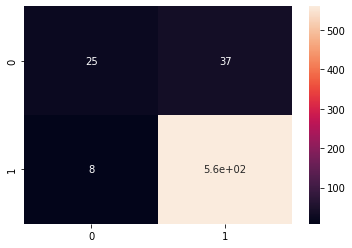

In [72]:
sns.heatmap(cm, annot=True)

In [73]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.40      0.53        62
           1       0.94      0.99      0.96       568

    accuracy                           0.93       630
   macro avg       0.85      0.69      0.74       630
weighted avg       0.92      0.93      0.92       630



### TRAINING AND ASESSING LOGISTIC REGRESSION

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

LogisticRegression()

In [76]:
Y_pred = logistic.predict(X_test)

In [77]:
accuracy_score(Y_test, Y_pred)

0.9285714285714286

In [78]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.34      0.48        62
           1       0.93      0.99      0.96       568

    accuracy                           0.93       630
   macro avg       0.89      0.67      0.72       630
weighted avg       0.92      0.93      0.91       630



### TESTING THE MODEL IN ONE STRING

In [79]:
import pickle

In [80]:
with open('text_classifier_one.pkl', 'wb') as f:
    pickle.dump([logistic, onehotencoder, vectorizer], f)

In [81]:
with open('text_classifier_one.pkl', 'rb') as f:
    logistic, onehot, vect = pickle.load(f)

In [82]:
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [83]:
negative_text = negative.iloc[0:1, [2,3]]
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [84]:
X_cat = negative_text[['variation']]
X_cat

,variation
46,Charcoal Fabric


In [85]:
X_cat = onehot.transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
X_cat.index = negative_text.index

In [87]:
X_cat.index, negative_text.index

(Int64Index([46], dtype='int64'), Int64Index([46], dtype='int64'))

In [88]:
negative_df = pd.concat([negative_text, X_cat], axis = 1)

In [89]:
negative_df

,variation,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
negative_df.drop(['variation'], axis = 1, inplace=True)

In [91]:
negative_count_vect = vect.transform(negative_df['verified_reviews'])

In [92]:
review = pd.DataFrame(negative_count_vect.toarray())

In [93]:
negative_df.drop(['verified_reviews'], axis = 1, inplace=True)
negative_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
negative_df.index = review.index

In [95]:
negative_final = pd.concat([negative_df, review], axis = 1)

In [96]:
negative_final

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
logistic.predict(negative_final)

array([0])

In [98]:
logistic.predict_proba(negative_final)

array([[0.62515527, 0.37484473]])